In [2]:
#Initializng the necessary imports for data manipulaiton
import pandas as pd

#Making sure all rows and columns are displayed
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
#importing the database
df = pd.read_csv("Spotify_Song_Attributes.csv");
# display(df)

In [4]:
# Cleaning the data based on null values
df = df.dropna(subset=['trackName', 'artistName', 'msPlayed'])  # Drop rows without basic info
df = df.dropna(thresh=df.shape[1]-3)  # Keep only rows with less than 3 null values
df['genre'] = df['genre'].fillna('unknown') # Fill missing genres with 'unknown'
display(df)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,unknown,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.1200,0.454,136.055,audio_features,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0


First exploration: Which genres are most popular?

(Our definition of popularity is which generes have the most total minutes played)

In [5]:
df_genre = df[df['genre'] != 'unknown'] # Dropping rows with unknown genres
df = df_genre[df_genre['msPlayed'] > 0]  # Drop rows with non-positive msPlayed values

# In order to narrow down the number of genres, we will use keywords to group them together
# Define genre mapping dictionary
genre_keywords = {
    'alternative': ['alt', 'alternative'],
    'pop': ['pop'],
    'rap': ['rap'],
    'edm': ['edm', 'electronic', 'dance'],
    'indie': ['indie'],
    'rock': ['rock'],
    'anime': ['anime'],
    'hip hop': ['hip hop', 'hip-hop'],
    'metal': ['metal'],
    'country': ['country'],
    'r&b': ['r&b', 'rnb', 'soul'],
    'jazz': ['jazz'],
    'lo-fi': ['lo-fi', 'lofi'],
    'classical': ['classic', 'classical'],
    'soundtrack': ['soundtrack', 'ost', 'video game'],
    'singer-songwriter': ['singer-songwriter', 'acoustic']
}

# Function to map genres based on keywords
def map_genre(genre_string):
    genre_lower = genre_string.lower()
    for main_genre, keywords in genre_keywords.items():
        if any(keyword in genre_lower for keyword in keywords):
            return main_genre
    return 'other'

# Apply the mapping to the genre column
df_genre['mapped_genre'] = df_genre['genre'].apply(map_genre)

df_genre_grouped = df_genre.groupby('mapped_genre')['msPlayed'].sum().reset_index() # Group by genre and sum msPlayed values
df_genre_grouped = df_genre_grouped.sort_values(by='msPlayed', ascending=False) # Sort by msPlayed in descending order
df_genre_grouped['hrsPlayed'] = df_genre_grouped['msPlayed'] / 3600000 # Convert msPlayed to hours
df_genre_grouped['hrsPlayed'] = df_genre_grouped['hrsPlayed'].round(2) # Round to 2 decimal places
df_genre_grouped = df_genre_grouped.drop(columns=['msPlayed']) # Drop the msPlayed column
df_genre_grouped = df_genre_grouped.rename(columns={'mapped_genre': 'genre'}) # Rename the column to 'genre'
df_genre_grouped = df_genre_grouped.reset_index(drop=True) # Reset the index
display(df_genre_grouped) # Display the final DataFrame with genre and hours played



<ipython-input-5-0ed9022a303c>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre['mapped_genre'] = df_genre['genre'].apply(map_genre)


,genre,hrsPlayed
0,pop,1498.65
1,alternative,530.26
2,other,453.20
3,indie,188.13
4,hip hop,148.67
5,rap,136.89
6,edm,123.21
7,singer-songwriter,115.84
8,lo-fi,90.91
9,anime,90.24


Now that we have a DataFrame that displays the most popular genres, we can use that to make a graph that shows how they compare to one another. The best graph for this situation would be a bar chart.

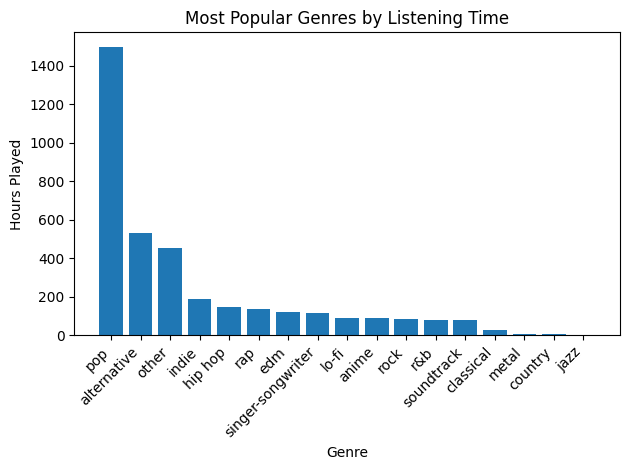

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make the plot
plt.bar(df_genre_grouped['genre'], df_genre_grouped['hrsPlayed'])

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.xlabel('Genre')
plt.ylabel('Hours Played')
plt.title('Most Popular Genres by Listening Time')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

We can see that the 'pop' category is represented much more than the others, lets explore that by breaking down the 'pop' category into sub-categories.

In this next block the data is filtered to only include genres with the word 'pop' in the name. Then the most represented pop genres (genres with 25 entries or more) are shown by popularity in terms of time played on a pie chart.

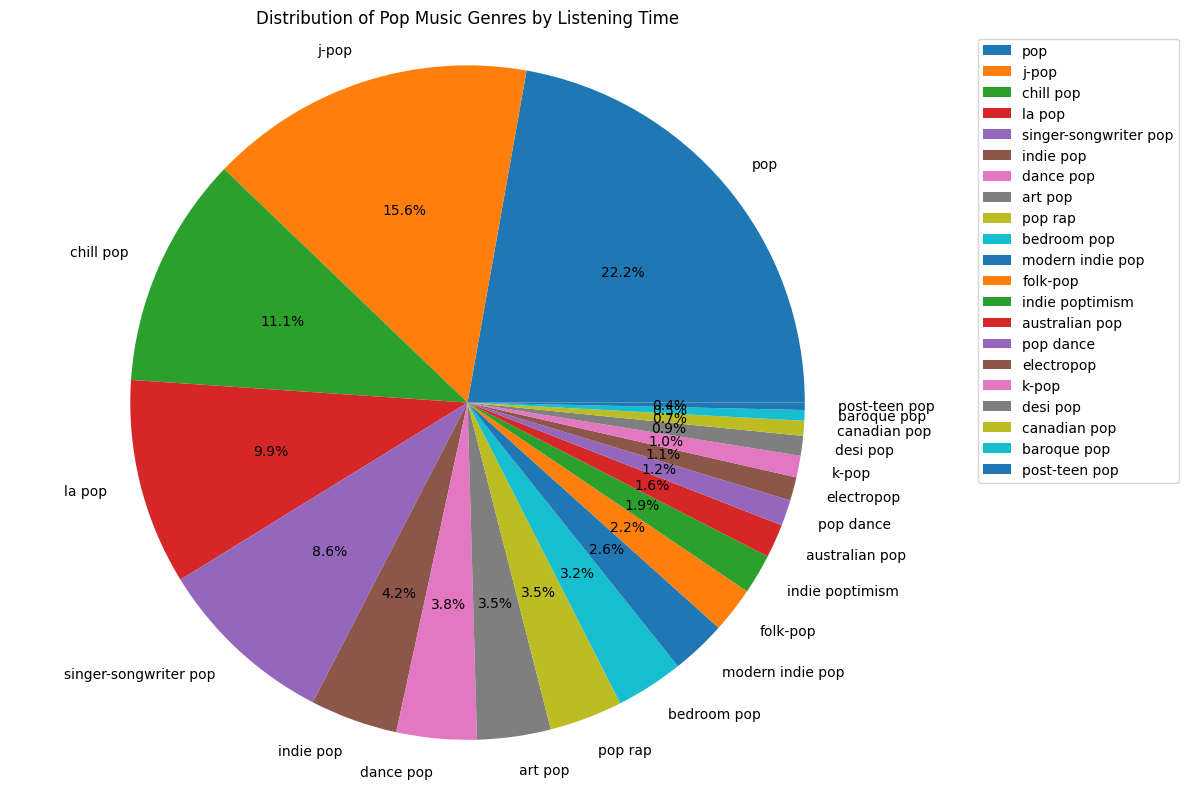

In [7]:
# Function to check if the genrename contains 'pop'
def pop_only(genre_string):
    genre_lower = genre_string.lower()
    if 'pop' in genre_lower:
        return True
    return False

# Apply the function to the genre column
df_pop = df.copy()

df_pop['pop_only'] = df_pop['genre'].apply(pop_only)

# Filter the DataFrame to include only pop songs
df_pop = df_pop[df_pop['pop_only'] == True]

# Group by genre and count entries
genre_counts = df_pop.groupby('genre').size()

# Get genres with 25 or more entries
popular_genres = genre_counts[genre_counts >= 25].index

# Filter df_pop to only include these genres
df_pop = df_pop[df_pop['genre'].isin(popular_genres)]

# Drop the temporary pop_only column
df_pop = df_pop.drop('pop_only', axis=1)

# Display the DataFrame with only pop songs
# Group by genre and calculate total hours played
df_pop_grouped = df_pop.groupby('genre')['msPlayed'].sum().sort_values(ascending=False)
df_pop_grouped = df_pop_grouped / 3600000  # Convert to hours

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_pop_grouped, labels=df_pop_grouped.index, autopct='%1.1f%%')
plt.title('Distribution of Pop Music Genres by Listening Time')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()





Now let's perform an ANOVA test to see if the mean time played of each genre are significantly different. This will tell us if any song is more likely to be popular because it is in a certain genre.

In [8]:
from scipy import stats
import numpy as np


df_genre = df_genre[df_genre['mapped_genre'] != 'other']  # Drop rows with 'other' genre
genre_groups = []
for name, group in df_genre.groupby('mapped_genre'):
    values = group['msPlayed'].values  # Get numpy array of msPlayed values
    genre_groups.append(values)
genre_names = df_genre['mapped_genre'].unique()


f_statistic, p_value = stats.f_oneway(*genre_groups)

print(f'One-way ANOVA Results:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')




One-way ANOVA Results:
F-statistic: 2.8090
p-value: 0.0002


Our p-value is 0.0002 < 0.5, therefore there are significant differences among the groups. We can draw the conclusion that the genre of a song and it's popularity/time played are correlated. We can see which genres indicate a high listening time if we just take a look at the means for each genre.

In [9]:
df_genre['minutesPlayed'] = df_genre['msPlayed'].astype(float)/60000
df_genre_mean_time = df_genre.groupby('mapped_genre')['minutesPlayed'].mean().reset_index()
df_genre_mean_time = df_genre_mean_time.sort_values(by='minutesPlayed', ascending=False)
df_genre_mean_time

,mapped_genre,minutesPlayed
14,singer-songwriter,53.466027
10,pop,34.744692
0,alternative,28.508606
6,indie,28.219629
4,edm,28.216050
5,hip hop,26.236085
12,rap,23.201966
13,rock,21.734404
9,metal,20.672557
11,r&b,19.954471


Going back to our earlier conclusion that pop is the most popular genre in terms of total time played, we can see from here that a song in the singer-songwriter genre is actually the most likely to have a high time played stat. We can also visualize this with a graph.

<ipython-input-10-f4e61c14d151>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',


Text(0, 0.5, 'Minutes Played')

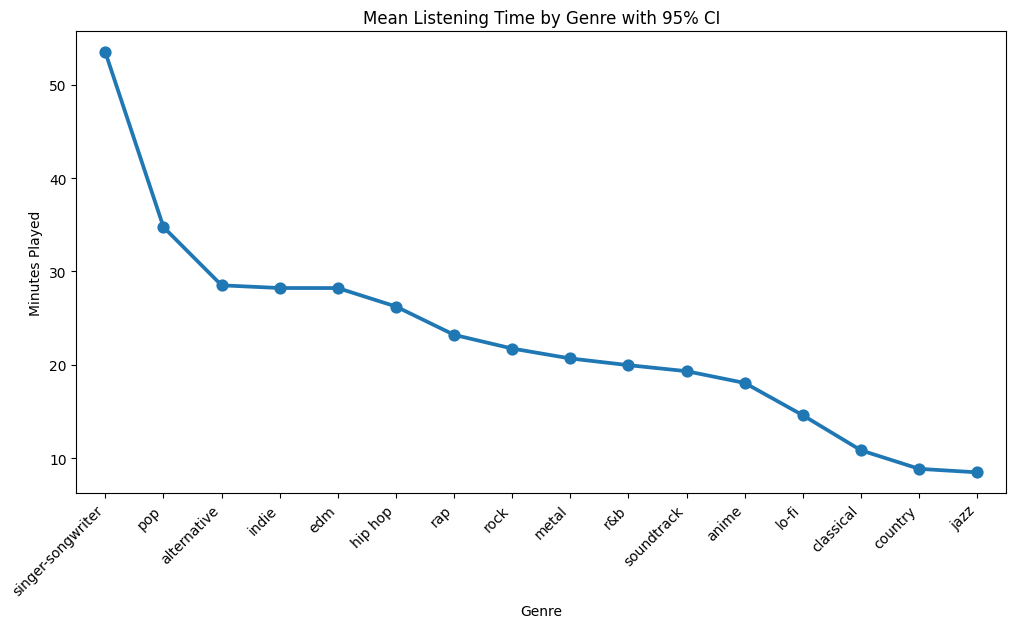

In [10]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',
              ci=95, capsize=0.2)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Listening Time by Genre with 95% CI')
plt.xlabel('Genre')
plt.ylabel('Minutes Played')

In [11]:
# Convert relevant columns to numeric
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['time_signature'] = pd.to_numeric(df['time_signature'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')

In [12]:
# Keep only relevant columns and drop rows with missing values
relevant_columns = ['trackName', 'artistName', 'genre', 'msPlayed', 'danceability', 'energy',
                    'valence', 'duration_ms', 'tempo', 'speechiness']
df_clean = df[relevant_columns].dropna()

In [13]:
# Display summary statistics
print(df_clean.describe())
print("\nUnique Genres:\n", df_clean['genre'].unique())

           msPlayed  danceability       energy      valence   duration_ms  \
count  8.524000e+03   8524.000000  8524.000000  8524.000000  8.524000e+03   
mean   1.546010e+06      0.601745     0.566079     0.435372  2.038258e+05   
std    5.575535e+06      0.158431     0.241490     0.242841  7.347258e+04   
min    8.000000e+01      0.000000     0.001080     0.000000  1.002700e+04   
25%    1.417410e+05      0.508000     0.407000     0.238000  1.629540e+05   
50%    2.732415e+05      0.622500     0.591000     0.409500  1.958800e+05   
75%    1.224504e+06      0.714000     0.752000     0.618000  2.310020e+05   
max    1.583671e+08      0.976000     0.999000     0.986000  1.847210e+06   

             tempo  speechiness  
count  8524.000000  8524.000000  
mean    119.110969     0.077917  
std      28.979390     0.077307  
min       0.000000     0.000000  
25%      97.115000     0.036100  
50%     118.899000     0.047800  
75%     139.440000     0.081100  
max     236.196000     0.777000  


T-test result: p = 0.0556


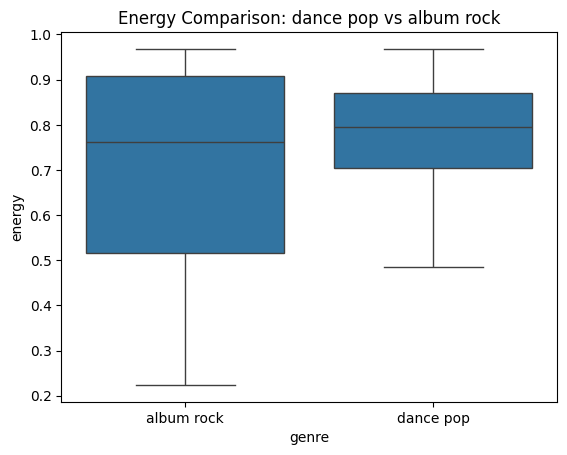

In [14]:
from scipy.stats import ttest_ind

genre1 = 'dance pop'
genre2 = 'album rock'
group1 = df_clean[df_clean['genre'] == genre1]['energy']
group2 = df_clean[df_clean['genre'] == genre2]['energy']

t_stat, p_val1 = ttest_ind(group1, group2, equal_var=False)
print(f"T-test result: p = {p_val1:.4f}")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(data=df_clean[df_clean['genre'].isin([genre1, genre2])], x='genre', y='energy')
plt.title(f'Energy Comparison: {genre1} vs {genre2}')
plt.show()

Correlation: r = 0.49


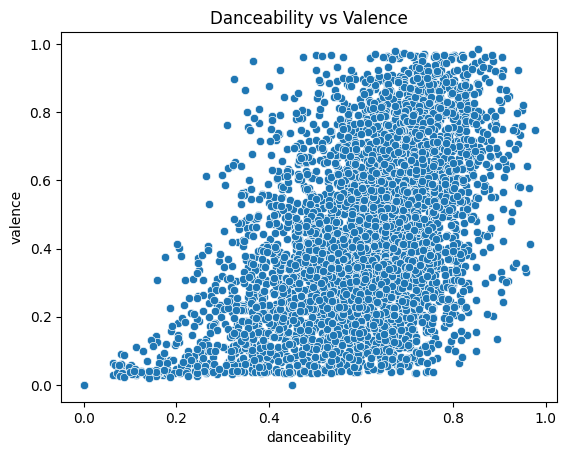

In [15]:
corr_val = df_clean['danceability'].corr(df_clean['valence'])
print(f"Correlation: r = {corr_val:.2f}")

# Plot
plt.figure()
sns.scatterplot(data=df_clean, x='danceability', y='valence')
plt.title('Danceability vs Valence')
plt.show()

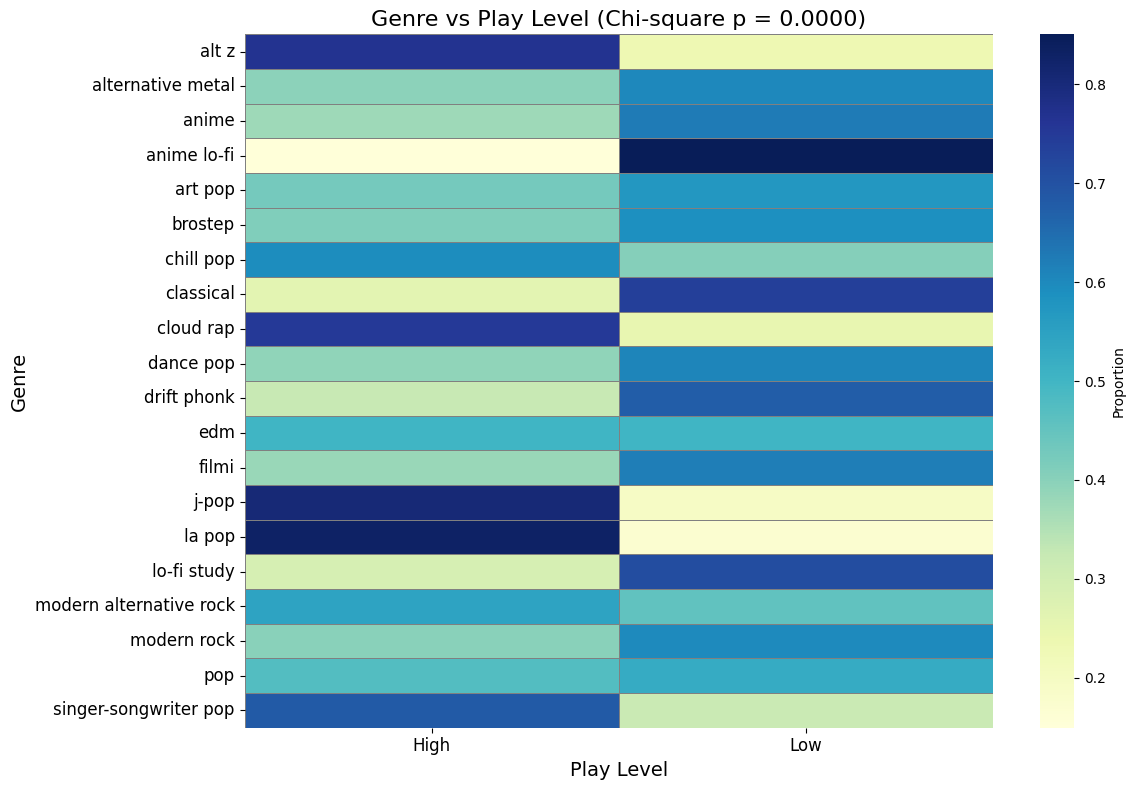

In [16]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize play level
median_play = df_clean['msPlayed'].median()
df_clean['play_level'] = df_clean['msPlayed'].apply(lambda x: 'High' if x > median_play else 'Low')

# Keep top 20 genres
top_genres = df_clean['genre'].value_counts().head(20).index
filtered = df_clean[df_clean['genre'].isin(top_genres)]

# Contingency table and Chi-square test
genre_play = pd.crosstab(filtered['genre'], filtered['play_level'])
chi2_stat, p_val2, _, _ = chi2_contingency(genre_play)

# Normalize by row to show proportions
genre_play_norm = genre_play.div(genre_play.sum(axis=1), axis=0)

# Plot heatmap (proportional values)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_play_norm, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Proportion'})
plt.title(f'Genre vs Play Level (Chi-square p = {p_val2:.4f})', fontsize=16)
plt.xlabel('Play Level', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
print("Conclusions:")
print(f"T-test (energy): p = {p_val1:.4f} → {'Significant' if p_val1 < 0.05 else 'Not significant'} energy difference between {genre1} and {genre2}.")
print(f"Correlation (danceability vs valence): r = {corr_val:.2f} → {'Positive' if corr_val > 0 else 'Negative'} relationship.")
print(f"Chi-square (genre vs play level): p = {p_val2:.4f} → {'Significant' if p_val2 < 0.05 else 'Not significant'} relationship between genre and play level.")

Conclusions:
T-test (energy): p = 0.0556 → Not significant energy difference between dance pop and album rock.
Correlation (danceability vs valence): r = 0.49 → Positive relationship.
Chi-square (genre vs play level): p = 0.0000 → Significant relationship between genre and play level.


Finding the mean song length:

3.397


Text(0, 0.5, 'Count')

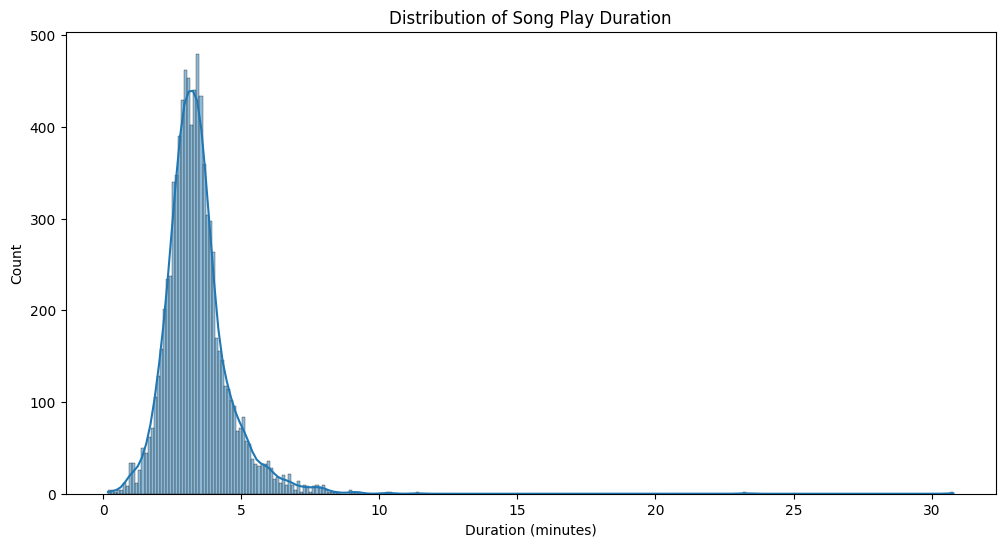

In [18]:
df_mean_duration = df_clean.copy()
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float)/60000 # Convert to minutes
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float).round(2)  # Round to 2 decimal places
print(df_mean_duration['duration_ms'].mean().round(3)) # Display mean duration in minutes

plt.figure(figsize=(12, 6))
sns.histplot(data=df_mean_duration['duration_ms'], kde=True)
plt.title('Distribution of Song Play Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

From this graph we can see that the song duration column has a normal distribution with a mean of ~3.4 minutes.